In [85]:
import numpy as np
import pandas as pd
import scipy.stats as stats


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [104]:
X_train = pd.read_csv('forecast_HIV_infections/data/x_train.csv', index_col=0)

In [105]:
y_train = pd.read_csv('forecast_HIV_infections/data/y_train.csv', index_col=0)

In [106]:
x_test = pd.read_csv('forecast_HIV_infections/data/x_test.csv', index_col=0)

In [107]:
y_test = pd.read_csv('forecast_HIV_infections/data/y_test.csv', index_col=0)

Using the Mean as a baseline predictor 

In [108]:
mean = y_train.mean()
mean

HIVincidence    17.848393
dtype: float64

In [109]:
res = y_test - y_train.mean()

In [110]:
mse = ((res)**2).mean()

In [111]:
mse

HIVincidence    135.47934
dtype: float64

(0, 50)

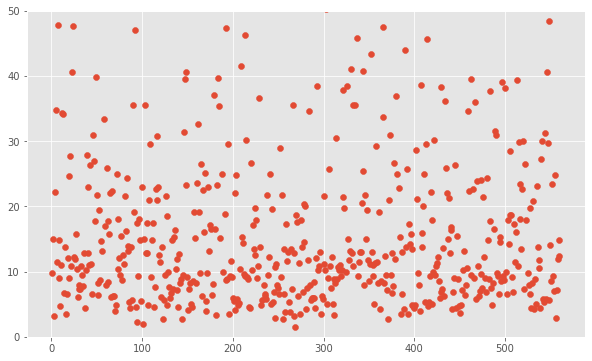

In [113]:
fig, ax = plt.subplots(figsize = (10,6))
x = np.linspace(1,len(y_train), len(y_train))

ax.scatter(x, y_train)
ax.axhline=(y_train.mean())
ax.set_ylim(0, 50) 

In [114]:
from src.cross_val_fun import *

In [119]:
X_train.drop(columns=['COUNTY','STATEABBREVIATION'], inplace=True)

In [126]:
x_test.drop(columns=['COUNTY','STATEABBREVIATION'], inplace=True)

In [120]:
cross_val(X_train.values, y_train.values, LinearRegression, n_folds=10, random_seed=154, scale=True)



TypeError: fit() missing 1 required positional argument: 'y'

In [121]:
model = LinearRegression()

In [122]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
y_hat = model.predict(x_test)

In [130]:
res = (y_test - y_hat)

In [131]:
mse = (res**2).mean()

In [132]:
mse

HIVincidence    302.729084
dtype: float64

In [140]:
new_X_train = X_train[['HIVprevalence','MSM12MTH','unemployment_rate','poverty_rate','household_income','percent_uninsured','ADULTMEN']]


In [141]:
new_x_test= x_test[['HIVprevalence','MSM12MTH','unemployment_rate','poverty_rate','household_income','percent_uninsured','ADULTMEN']]

In [135]:
new_model = LinearRegression()
model.fit(new_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
new_y_hat = model.predict(new_x_test)

In [144]:
res = (y_test - new_y_hat)

In [145]:
mse3 = (res**2).mean()

In [148]:
mse3

HIVincidence    99.850265
dtype: float64

In [149]:
np.sqrt(mse)

HIVincidence    9.99251
dtype: float64

In [159]:
cross_val(new_X_train.values, y_train.values, LinearRegression, n_folds=10, random_seed=154, scale=True)


TypeError: fit() missing 1 required positional argument: 'y'

In [154]:
from sklearn.linear_model import LinearRegression

def crossVal(X_train, y_train, k):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    kf = KFold(n_splits=k, shuffle=True)
    fold_scores = []
    for train, test in kf.split(X_train):
        model = LinearRegression()
        model.fit(X_train[train], y_train[train])
        #train_predict = model.predict(X_train[train])
        test_predict = model.predict(X_train[test])
        fold_scores.append(mean_squared_error(y_train[test], test_predict))
    print(np.mean(fold_scores))
    
crossVal(new_X_train, y_train, 5)

1052.9930563687885


In [ ]:
mean_squared_error()